# Supervised Learning

## 1. Multi-Variate Linear Regression 

### Import Standard Libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

### Import Dataset

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip

--2021-09-07 14:46:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3674852 (3.5M) [application/x-httpd-php]
Saving to: ‘CCPP.zip.2’

CCPP.zip.2          100%[===================>]   3.50M  3.37MB/s    in 1.0s    

2021-09-07 14:46:57 (3.37 MB/s) - ‘CCPP.zip.2’ saved [3674852/3674852]



In [ ]:
df=pd.read_excel('CCPP/Folds5x2_pp.xlsx')
df.sample(10)

,AT,V,AP,RH,PE
623,17.83,44.92,1025.04,70.58,458.42
2508,30.98,67.45,1015.18,45.40,433.59
4421,31.82,73.68,1014.80,40.58,433.32
7969,20.61,65.61,1014.91,83.82,449.72
7028,29.77,67.07,1005.82,48.38,433.89
7190,13.08,39.28,1012.41,77.98,474.13
2135,14.19,43.71,1024.38,83.03,467.80
8212,20.71,58.18,1007.63,98.44,447.06
4847,18.55,61.87,1008.45,65.30,450.73
4783,24.35,73.17,1012.20,85.88,435.66


Dataset link: https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

In this dataset, we want predict the net hourly **electrical energy output (PE)** of a power plant with features such as hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V)

### Exploratory Data Analysis (EDA)
- Perform Initial analysis of the data

In [ ]:
# Check Size of dataset
df.shape

(9568, 5)

In [ ]:
# Check datatypes
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

- Regression models require inputs to be continous data, so it is important to check datatypes

- Some categorical data can be numerical, such as age groups

- In this dataset, all of the variables are have float datatypes, so they can be fitted to a Linear Regression model

In [ ]:
# Check for missing values
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

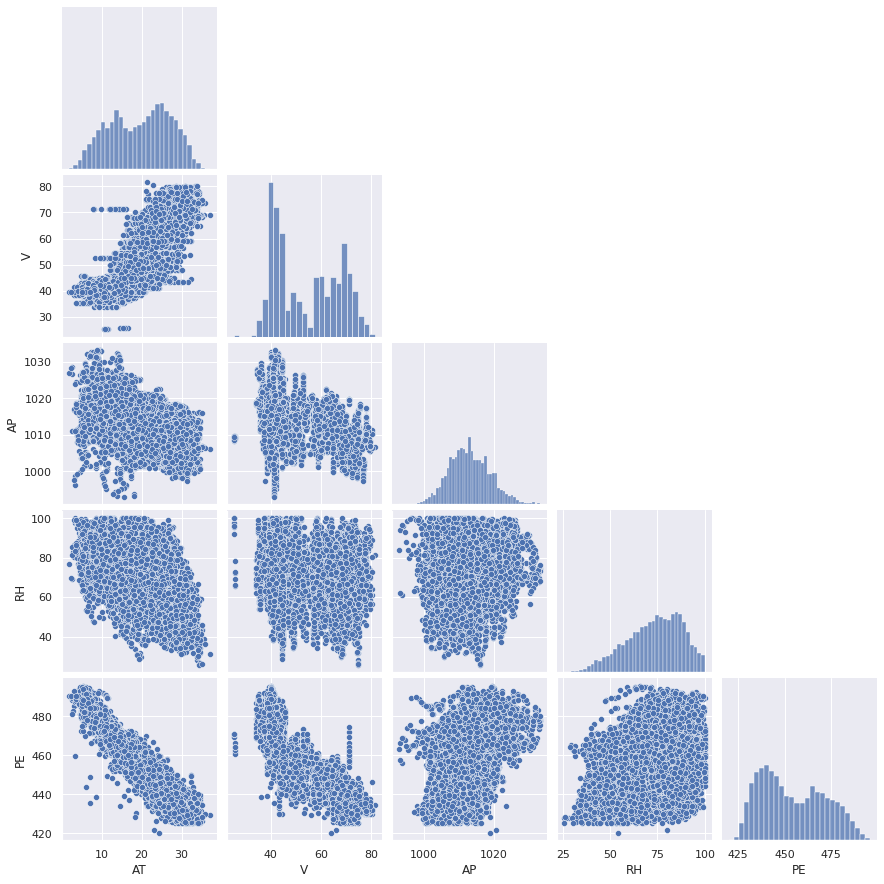

In [ ]:
# Explain the use of pairplot and heatmap
sb.set()
sb.pairplot(data = df, corner = True)

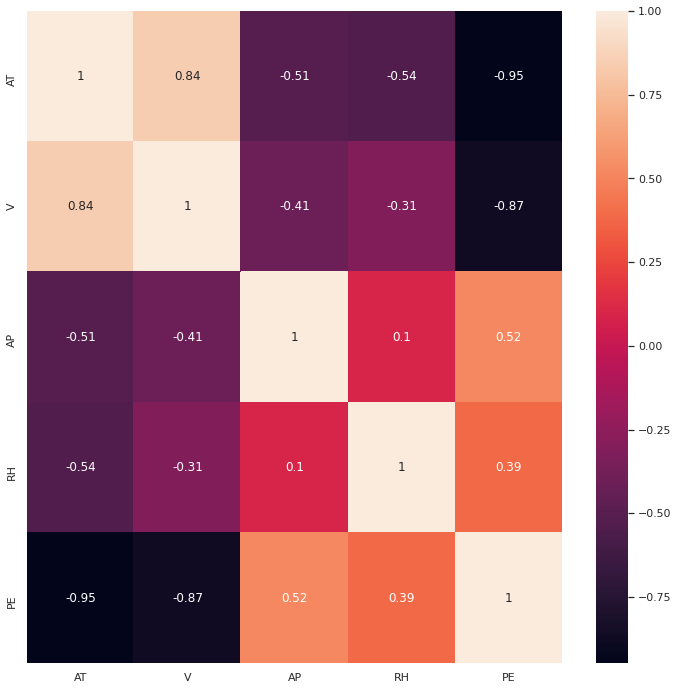

In [ ]:
corr = df.corr()

plt.figure(figsize = (12,12))
sb.heatmap(corr, annot = True)

### Define X (inputs) and y (outputs)

In [ ]:
X = df.drop('PE', axis = 1)
y = df.PE

### Split Dataset to train and test


- If we do not split our datatsets, it is likely that our model would learn too much from our dataset and fail to make accurate predictions with other inputs not present in the original dataset 

- Think of it as the model has already 'memorise' the original dataset.

- Thus, the test dataset allows us to determine the performance of our model since it is a completely new dataset that our model have not been trained from 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

### Fit the Model

In [ ]:
from sklearn.linear_model import LinearRegression


# Create object for LinearRegression instance
linreg = LinearRegression()
linreg.fit(X_train,y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)
  

### Evaluate the Model

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9284329768650795
Mean Squared Error (MSE) 	: 20.95381280023653

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9297287278683143
Mean Squared Error (MSE) 	: 20.035208133454002



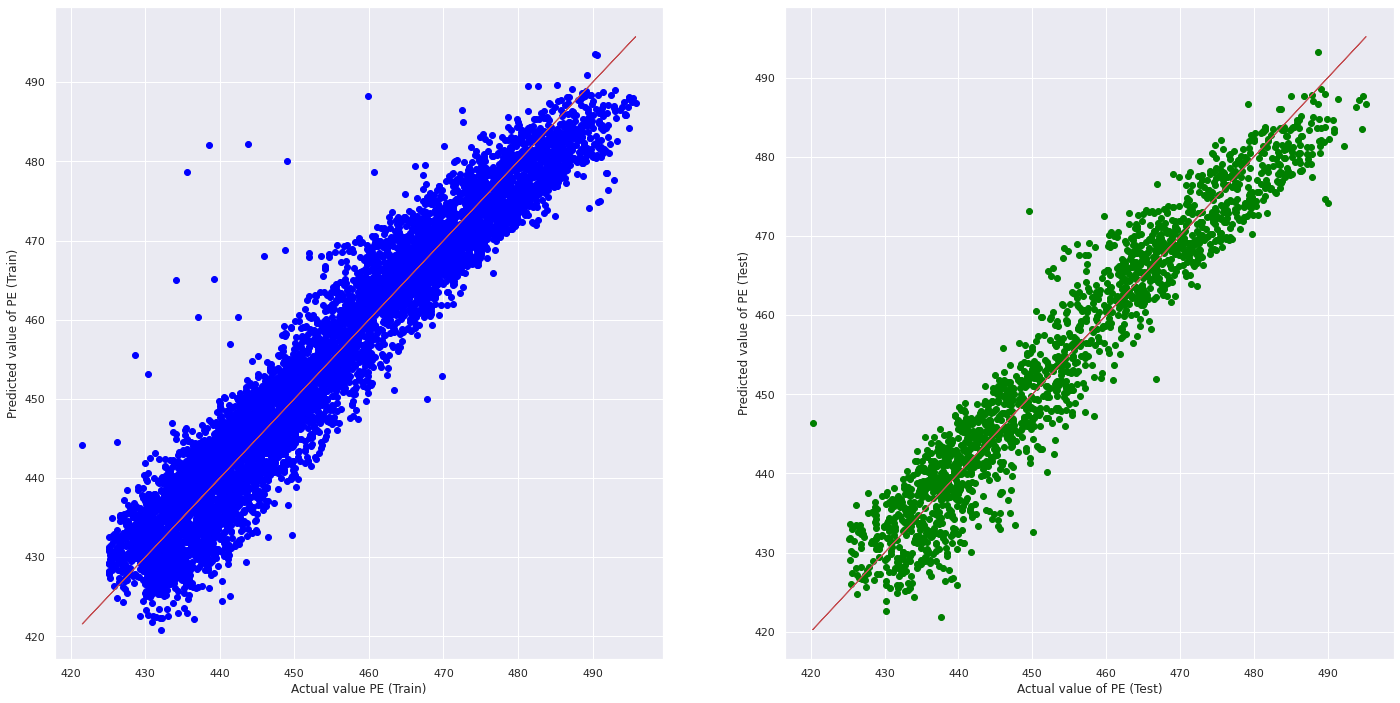

In [ ]:
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("Actual value PE (Train)")
axes[0].set_ylabel("Predicted value of PE (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("Actual value of PE (Test)")
axes[1].set_ylabel("Predicted value of PE (Test)")
plt.show()

- From the relatively high R^2 values and low MSE of the train and test datasets we can see that our model is generally well fitted 

- With a new set of inputs, the model can potentially be used to generate relatively accurate predictions of Electrical Energy Output (PE) of the plant

## 2. Classification

### Import Dataset

In [ ]:
!wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P12-Churn-Modelling.xlsx

--2021-09-08 10:09:00--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P12-Churn-Modelling.xlsx
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.96.64
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.96.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 910322 (889K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘P12-Churn-Modelling.xlsx.3’

P12-Churn-Modelling 100%[===================>] 888.99K  2.25MB/s    in 0.4s    

2021-09-08 10:09:01 (2.25 MB/s) - ‘P12-Churn-Modelling.xlsx.3’ saved [910322/910322]



In [ ]:
df1=pd.read_excel('P12-Churn-Modelling.xlsx')
df1.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3907,3908,15658890,Belonwu,603,Germany,Male,46,4,98899.76,2,1,1,86190.34,0
3741,3742,15635396,Thompson,738,Germany,Female,29,9,139106.19,1,1,0,141872.05,1
3923,3924,15595047,Murray,764,France,Male,41,7,0.00,2,0,0,134878.34,0
52,53,15683553,O'Brien,788,France,Female,33,5,0.00,2,0,0,116978.19,0
366,367,15633537,Nolan,540,Germany,Female,42,9,87271.41,2,1,0,172572.64,0
2631,2632,15681196,Chikere,629,France,Male,35,1,172170.36,1,1,1,159777.37,0
1740,1741,15672132,Butusov,695,France,Female,42,7,121453.63,1,0,0,46374.64,0
8595,8596,15668774,Chiemenam,758,Germany,Female,23,5,122739.10,1,1,0,102460.84,1
2444,2445,15572461,Kung,663,Germany,Female,29,4,102714.65,2,0,0,21170.81,0
7223,7224,15729771,Davide,799,Germany,Male,31,9,154586.92,1,0,1,88604.89,1


In [ ]:
df1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

- For this dataset, we want to predict Customer Churn (represented by the column Exited) using the given inputs

- 0 represents that the customer is continuing to use the services of the bank and 1 presents that the customer has stopped using the services of the bank for the given time period

- We also noticed that the dataset is rather imbalanced. We will explore techniques in handling these imbalanced datasets in the subsequent section

### EDA and Data Preprocessing

In [ ]:
# Check size of dataset
df1.shape

(10000, 14)

In [ ]:
# Check datatypes of dataset
df1.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

- Intuitively, it is known that CustomerID, RowNumber and Surname would probably not affect the outcome of Customer Churn Significantly

In [ ]:
df1.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df1.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7920,714,France,Male,34,5,141173.03,1,0,1,98896.06,0
8120,523,France,Male,45,5,0.00,2,1,1,121428.20,0
1651,634,Spain,Male,31,9,108632.48,1,1,1,179485.96,1
9774,679,France,Male,42,1,0.00,2,0,0,71823.15,0
8258,590,France,Male,41,1,89086.31,1,1,0,24499.97,0
9316,550,Germany,Male,49,0,108806.96,3,1,0,61446.92,1
4153,695,Germany,Female,53,8,95231.91,1,0,0,70140.80,1
6739,509,France,Male,55,8,132387.91,2,1,1,170360.11,0
3989,666,France,Male,30,7,109805.30,1,0,1,163625.56,0
5645,717,Spain,Female,42,5,190305.78,1,1,0,99347.80,1


#### Data Visualisation

In [ ]:
# Left with 2 object datatypes, Geography and Gender
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# print unique values for columns with object datatype
for column in df1:
  if df1[column].dtypes == 'object':
    print(f'{column}:{df1[column].unique()}')

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


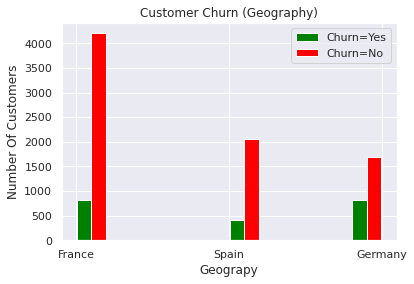

In [ ]:
sb.set()
geo_churn_no = df1[df1.Exited==0].Geography
geo_churn_yes = df1[df1.Exited==1].Geography

plt.xlabel("Geograpy")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn (Geography)")
plt.hist([geo_churn_yes, geo_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

- From the histplots, we can observe that the dataset is concerning the customers from 3 countries France, Spain and Germany

- For France and Spain, the bank retained most of their services but for Germany despited having the lowest customer base it has the most number of customers exiting it services

- Get a sense of trends and understanding the dataset

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


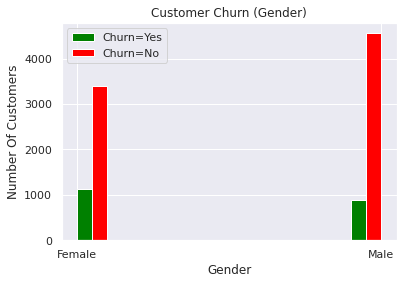

In [ ]:
gender_churn_no = df1[df1.Exited==0].Gender
gender_churn_yes = df1[df1.Exited==1].Gender

plt.xlabel("Gender")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn (Gender)")
plt.hist([gender_churn_yes, gender_churn_no], rwidth=1, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

- More Female customers exited the bank services than Males

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


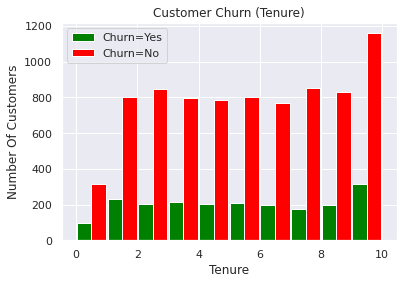

In [ ]:
tenure_churn_no = df1[df1.Exited==0].Tenure
tenure_churn_yes = df1[df1.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn (Tenure)")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

- It seems that the length of tenure does not determine if the customer chose to exit the bank services or not given the relatively similar number of exits for the various tenure years

#### One Hot Encoding (OHE)

- Many machine learning algorithms require both inputs and outputs to be numerical 
- **One Hot Encoding** is a technique used to convert categorical data to integer values 



In [ ]:
# Left with 2 object datatypes, Geography and Gender
for column in df1:
    if df1[column].dtypes == 'object':
        print(f'{column}: {df1[column].unique()}')

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [ ]:
# For Gender, we can simply use the .replace method 
df1.replace({'Female':0, 'Male':1}, inplace = True)
df1.Gender.unique()

array([0, 1])

In [ ]:
# For Geography we can use the get_dummies method from pandas
df1 = pd.get_dummies(data = df1, columns = ['Geography'], drop_first= True)
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
401,593,0,38,4,129499.42,1,1,1,154071.27,0,1,0
4576,697,0,40,7,130334.35,2,0,1,116951.10,0,0,1
771,717,1,31,4,129722.57,1,0,0,41176.60,0,0,0
6759,705,1,92,1,126076.24,2,1,1,34436.83,0,0,0
6275,642,0,33,9,0.00,2,1,1,150475.14,0,0,1
6333,634,1,34,8,105302.66,1,1,1,123164.97,0,0,0
496,622,0,32,6,169089.38,2,1,0,101057.95,0,0,0
60,742,1,35,5,136857.00,1,0,0,84509.57,0,1,0
3472,594,1,40,9,122417.17,2,0,1,190882.69,0,0,0
4764,696,0,36,3,0.00,3,1,0,65039.90,0,0,1


- Note that the drop_first drops the first column created for a dummy variable

- This is to avoid **Dummy Variable Trap** as the Geography_France is already represented by 0 in the other 2 dummy variables (multi-collinearity)

#### Scaling Data

In [ ]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Minimax scaler scaler scales data based on maximum and minimum data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2 = df1.copy()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
1625,680,1,44,3,0.00,2,1,0,86935.08,0,0,0
1784,658,1,36,8,174060.46,1,1,1,94925.62,0,0,0
9661,675,0,39,6,0.00,2,0,0,83419.15,0,0,0
3280,583,0,57,3,238387.56,1,0,1,147964.99,1,0,0
747,450,0,46,5,177619.71,1,1,0,54227.06,0,0,1
6573,647,1,35,3,192407.97,1,1,1,40145.28,0,1,0
7049,602,0,39,6,154121.32,2,1,0,176614.86,1,0,0
2497,613,1,20,3,0.00,2,1,1,149613.77,0,0,0
9534,773,1,52,2,0.00,2,1,0,57337.79,0,0,1
7334,616,1,18,6,0.00,2,1,1,27308.58,0,0,0


- Scaling Data generally speeds up learning and leads to faster convergence of model

- Especially important for neural networks covered in later workshops

- Scaling data may not be necessary for Logistic Regression and Decision Tree algorithms 

- Documentation: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

### Logistic Regression

#### Define X and y

In [ ]:
X = df1.drop('Exited', axis  =1  )
y = df1['Exited']

#### Split Dataset to train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#### Model Fitting

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

#### Evaluate Model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_classification_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize = (10,7))
  sb.heatmap(cm, annot= True, fmt = 'd')

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      1600
           1       0.43      0.07      0.11       400

    accuracy                           0.80      2000
   macro avg       0.62      0.52      0.50      2000
weighted avg       0.73      0.80      0.73      2000



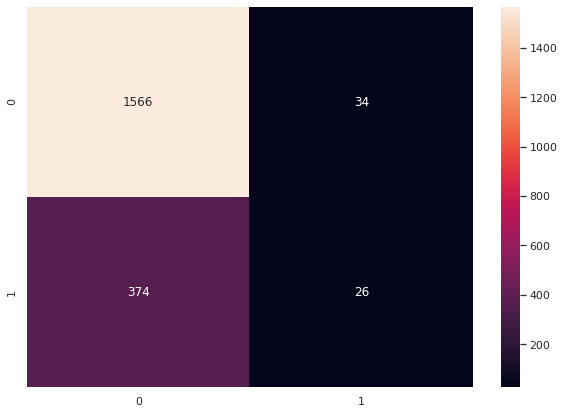

In [ ]:
evaluate_classification_model(logreg, X_test,y_test)

### Decision Tree Classifier

In [ ]:
# Define X and y
X = df1.drop('Exited', axis  =1  )
y = df1['Exited']

# Split dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#### Model Fitting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(max_depth = 2)

dectree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Visualize Decision Tree

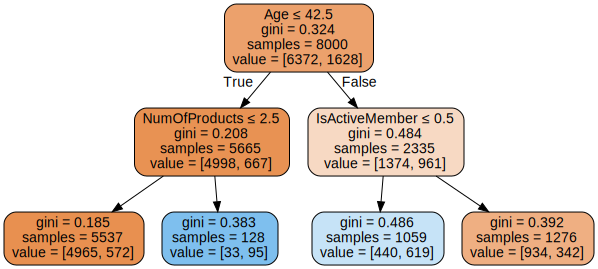

In [ ]:
from sklearn.tree import export_graphviz

dt_diagram = export_graphviz(dectree,
                         feature_names = X_train.columns,
                         out_file = None,
                         filled = True,
                         rounded = True,
                         special_characters = True)

import graphviz
graphviz.Source(dt_diagram)


#### Evaluate Model

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1591
           1       0.66      0.45      0.53       409

    accuracy                           0.84      2000
   macro avg       0.77      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



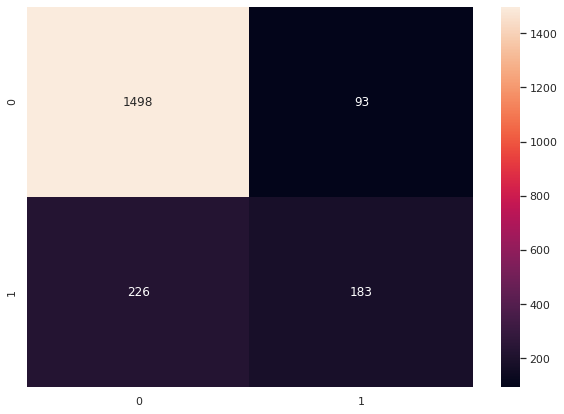

In [ ]:
evaluate_classification_model(dectree, X_test,y_test)

### Hyperparameter Tuning







In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
 model_parameters = {
  'decision_tree_classifier':{
    'model':DecisionTreeClassifier(),
    'params':{
        'max_depth': [2, 3, 5, 10, 20]
      }
    },

    'logistic_regression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,5,10]
      }
    }
  }

In [ ]:
def find_best_model_using_gridsearchcv(model_parameters,X,y):
  scores = []
  for model_name, parameters in model_parameters.items():
      gs = GridSearchCV(parameters['model'], parameters['params'], cv= 5, return_train_score = False)
      gs.fit(X,y)
      scores.append({
          'model':model_name,
          'best_score': gs.best_score_,
          'best_params': gs.best_params_
      })
      
  return pd.DataFrame(scores, columns = ['model','best_score','best_params'])
  


In [ ]:
find_best_model_using_gridsearchcv(model_parameters,X,y)

,model,best_score,best_params
0,decision_tree_classifier,0.8520,{'max_depth': 5}
1,logistic_regression,0.7907,{'C': 1}


### K-Fold Cross Validation 

In [ ]:
from sklearn.model_selection import cross_val_score

logreg_score = cross_val_score(LogisticRegression(), X,y, cv = 5)
logreg_score

array([0.7915, 0.791 , 0.7935, 0.789 , 0.7885])

- Dataset is randomly split into k groups and one of the groups is used as the test set while the others are used to train the model

- With cv = 5, there is 1 test and 4 train datatsets for each of the 5 splits

- K-Fold Cross Validation allows our model to train on multiple train and test datasets, giving us a better indication of our model's performance

### Imbalanced Dataset (UnderSampling)

In [ ]:
df3 = df1.copy()

count_class_0, count_class_1 = df3.Exited.value_counts()
count_class_0, count_class_1

(7963, 2037)

In [ ]:
df3_class_0 = df3[df3['Exited'] == 0]
df3_class_1 = df3[df3['Exited'] == 1]

#UnderSample Class 0

df3_class_0_under = df3_class_0.sample(count_class_1)

df3_under_sample = pd.concat([df3_class_0_under,df3_class_1], axis  =0)
df3_under_sample.Exited.value_counts()

1    2037
0    2037
Name: Exited, dtype: int64

In [ ]:
X = df3_under_sample.drop('Exited', axis = 1)
y = df3_under_sample['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15, stratify = y)

              precision    recall  f1-score   support

           0       0.68      0.71      0.70       408
           1       0.70      0.67      0.68       407

    accuracy                           0.69       815
   macro avg       0.69      0.69      0.69       815
weighted avg       0.69      0.69      0.69       815



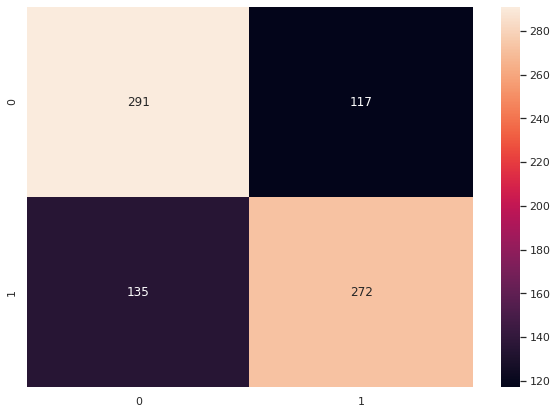

In [ ]:
dectree_under = DecisionTreeClassifier()
dectree_under.fit(X_train,y_train)

evaluate_classification_model(dectree_under, X_test,y_test)

- Other Sampling methods: Oversampling, SMOTE etc..

# Unsupervised Learning

## Clustering

### K-means

Importing Standard Libraries

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets

Importing Iris Dataset
> The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species. The dataset is often used in data mining, classification and clustering examples and to test algorithms.

In [ ]:
iris = datasets.load_iris()
X = iris.data

Fitting dataset into the K-Means model

In [ ]:
km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)
labels = km.labels_

Plotting the result in a 3D model

Text(0.5, 0.92, 'K Means')

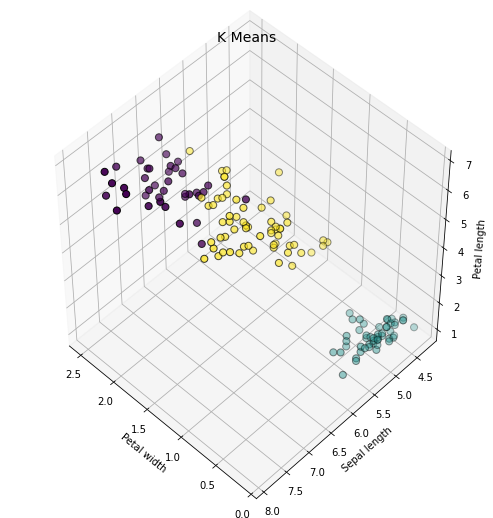

In [ ]:
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)

Problem with K-Means
> K-means does hard labeling. The datapoints at the boundary of the purple and yellow clusters can be in any of the one. But with K-means, it adds the label of the maximum probability. However, certain datapoints that exist at the boundary of clusters may simply have similar probabilities of being on either clusters. 

> In such cases, we should look at all probabilities instead of max probabilities. This is known as "soft labeling".

### Gaussian Mixture Model

Importing Standard Libraries

In [ ]:
from sklearn.mixture import GaussianMixture

Fitting data into Gaussian Mixture Model

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
proba_lists = gmm.predict_proba(X)

Plotting the result in a 3D model

Text(0.5, 0.92, 'Gaussian Mixture Model')

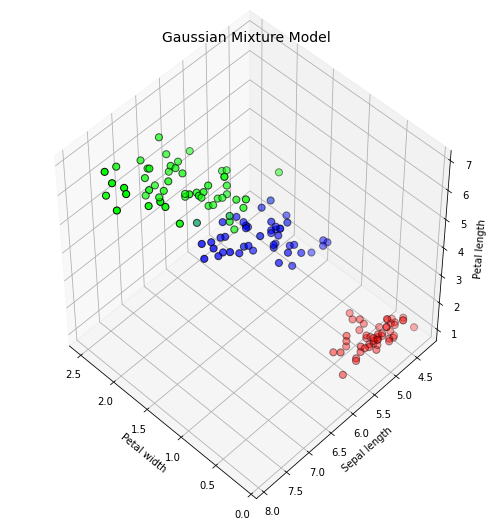

In [ ]:
colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
          c=colored_tuples, edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Gaussian Mixture Model", fontsize=14)

> The RGB values are based on the nearness to each of the red, blue and green clusters. If you look at the datapoints near the boundary of the blue and red cluster, you shall see purple, indicating the datapoints are close to either clusters.